In [93]:
# Import the folder from Google Drive
# Dataset source: https://www.kaggle.com/competitions/playground-series-s5e10/data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [95]:
# Access the file location
os.chdir("/content/drive/MyDrive/Dataset for Study/Road Accident Risk")

In [96]:
# Check what the folder contains of
os.listdir()

['sample_submission.csv',
 'test.csv',
 'train.csv',
 'submission_accident_risk.csv']

In [97]:
# Read "train.csv" file
train = pd.read_csv("train.csv")
train

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [98]:
# Read "test.csv" file
test = pd.read_csv("test.csv")
test

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,rural,2,0.01,45,dim,rainy,False,False,afternoon,True,True,2
172581,690335,rural,1,0.74,70,daylight,foggy,False,True,afternoon,False,False,2
172582,690336,urban,2,0.14,70,dim,clear,False,False,evening,True,True,1
172583,690337,urban,1,0.09,45,daylight,foggy,True,True,morning,False,True,0


In [99]:
# See informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [100]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


# Data Visualization

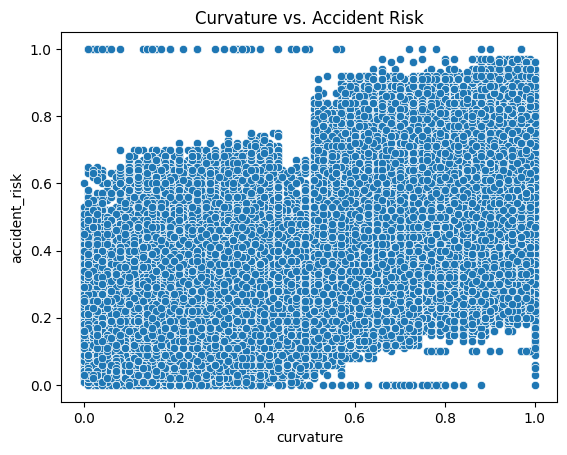

In [102]:
sns.scatterplot(x = "curvature",
                y = "accident_risk",
                data = train)
plt.title("Curvature vs. Accident Risk")
plt.show()

The larger the curvature of the road, the higher its potential to cause a road accident, and vice versa.

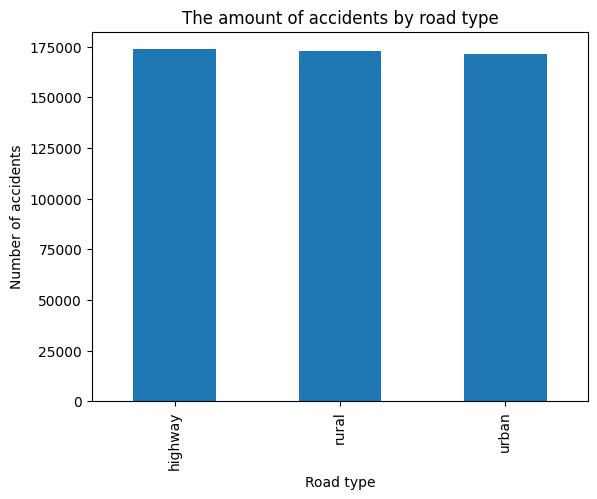

In [103]:
train["road_type"].value_counts().sort_index().plot(kind = "bar")
plt.title("The amount of accidents by road type")
plt.xlabel("Road type")
plt.ylabel("Number of accidents")
plt.show()

The distributions are almost equal to each other.It means road accidents can happen anywhere, regardless of the area.

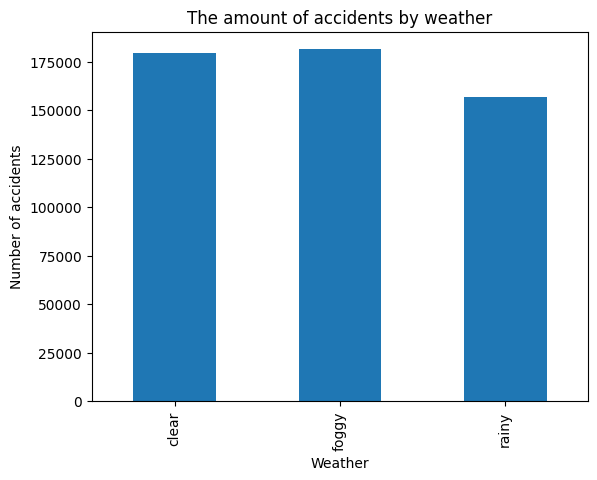

In [104]:
train["weather"].value_counts().sort_index().plot(kind = "bar")
plt.title("The amount of accidents by weather")
plt.xlabel("Weather")
plt.ylabel("Number of accidents")
plt.show()

Most of road accidents happen during foggy weather.

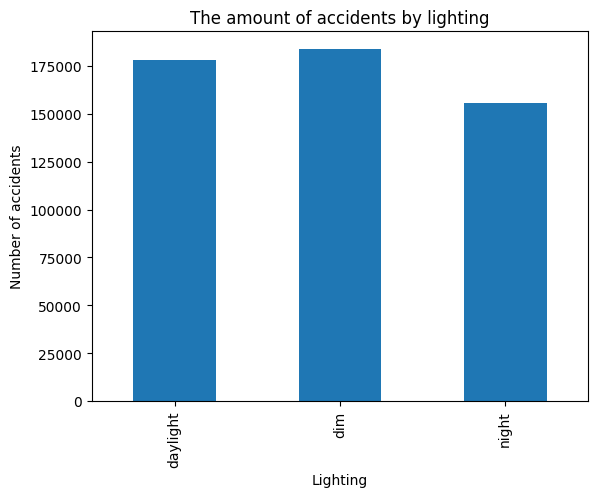

In [105]:
train["lighting"].value_counts().sort_index().plot(kind = "bar")
plt.title("The amount of accidents by lighting")
plt.xlabel("Lighting")
plt.ylabel("Number of accidents")
plt.show()

Road accident most likely happens in places that have poor lighting (dimmed place).

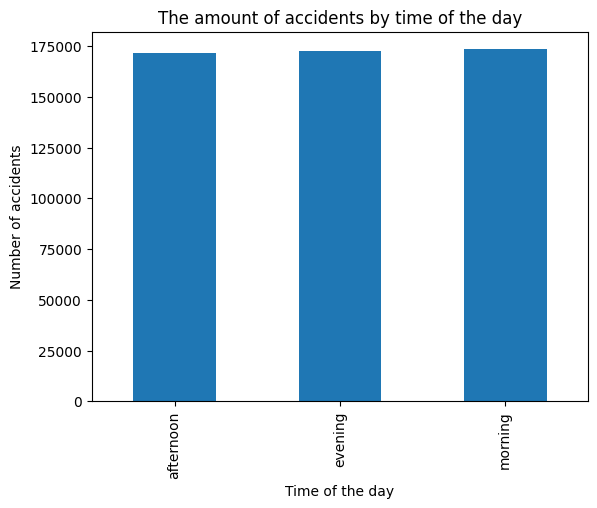

In [106]:
train["time_of_day"].value_counts().sort_index().plot(kind = "bar")
plt.title("The amount of accidents by time of the day")
plt.xlabel("Time of the day")
plt.ylabel("Number of accidents")
plt.show()

Majority of road accident cases happen during morning time.

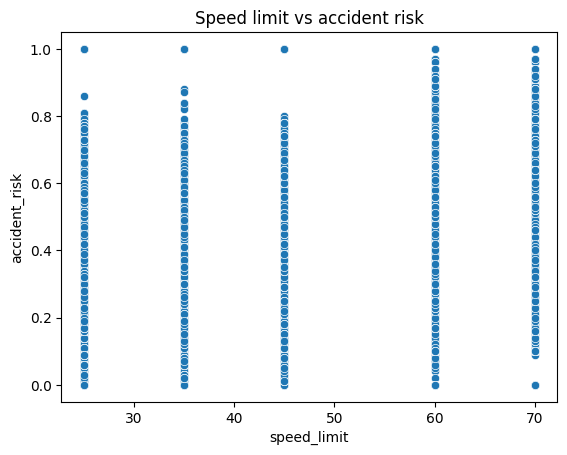

In [107]:
sns.scatterplot(x = "speed_limit",
                y = "accident_risk",
                data = train)
plt.title("Speed limit vs accident risk")
plt.show()

The lower the speed limit, the lower the accident risk, and vice versa.

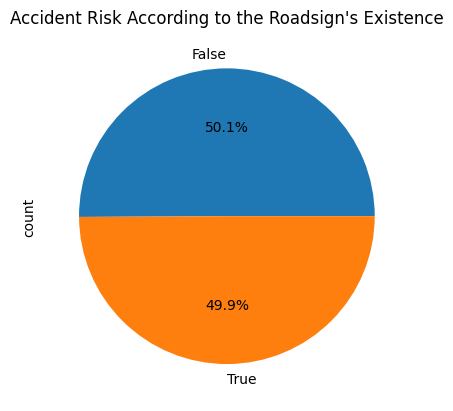

In [108]:
train["road_signs_present"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("Accident Risk According to the Roadsign's Existence")
plt.show()

Road accident often happens in a place where there are no roadsigns.

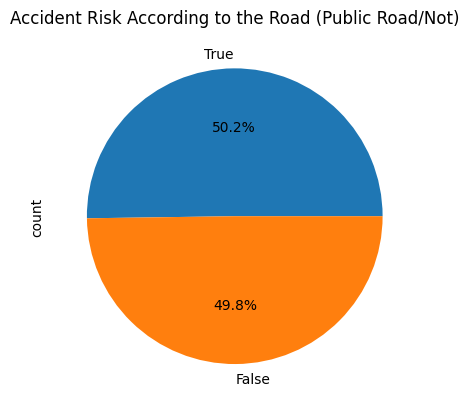

In [109]:
train["public_road"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("Accident Risk According to the Road (Public Road/Not)")
plt.show()

Road accident happens more often in the public road.

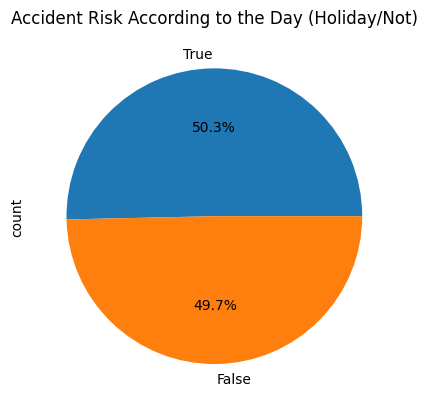

In [110]:
train["holiday"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("Accident Risk According to the Day (Holiday/Not)")
plt.show()

During holidays, road accident is potentially more often to happen than the casual days.

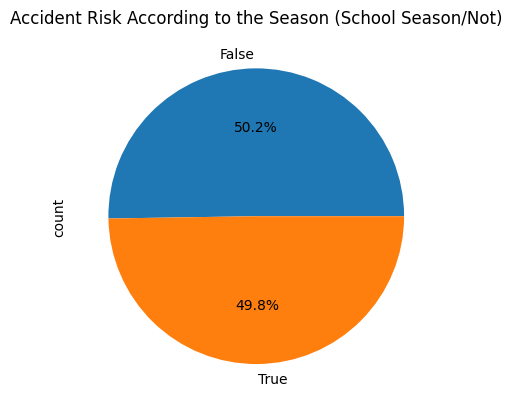

In [111]:
train["school_season"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("Accident Risk According to the Season (School Season/Not)")
plt.show()

In all probability, accident cases usually happen on non-school season, which strongly correlates to the distribution where the majority of the accident cases recorded are mostly found on holidays.

<Axes: >

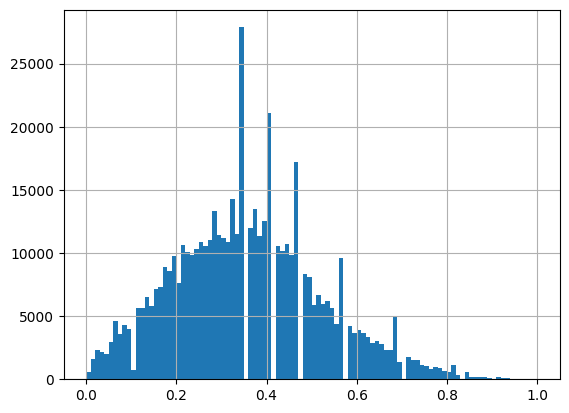

In [112]:
# Create a histogram for "accident_risk" column
train["accident_risk"].hist(bins = 100)

This shows a Right Skewed Histogram, where the majority of the data are concentrated of the left-side (smaller values) and the higher values as the tail on the right-side. It means most of the data have lower accident risks.

# Feature Engineering

In [113]:
# Change boolean data from train and test dataset to integer type
train[train.select_dtypes('bool').columns] = train.select_dtypes('bool').astype(int)
test[test.select_dtypes('bool').columns] = test.select_dtypes('bool').astype(int)

In [114]:
# Select all object-typed columns and separate them into their new own columns (boolean)
categorical_columns = ['road_type', 'lighting', 'weather', 'time_of_day']
train_data = pd.get_dummies(train, columns=categorical_columns)
test_data = pd.get_dummies(test, columns=categorical_columns)

In [115]:
train_data

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,0,1,0,1,1,0.13,...,True,True,False,False,False,False,True,True,False,False
1,1,4,0.99,35,1,0,1,1,0,0.35,...,True,True,False,False,True,False,False,False,True,False
2,2,4,0.63,70,0,1,1,0,2,0.30,...,False,False,True,False,True,False,False,False,False,True
3,3,4,0.07,35,1,1,0,0,1,0.21,...,False,False,True,False,False,False,True,False,False,True
4,4,1,0.58,60,0,0,1,0,1,0.56,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,1,0,0,2,0.32,...,False,True,False,False,False,True,False,True,False,False
517750,517750,4,0.47,35,1,1,0,0,1,0.26,...,False,True,False,False,False,False,True,False,False,True
517751,517751,4,0.62,25,0,0,0,1,0,0.19,...,True,True,False,False,False,True,False,True,False,False
517752,517752,3,0.63,25,1,0,1,1,3,0.51,...,False,False,False,True,True,False,False,True,False,False


In [116]:
# Drop 'id' column only if it exists
if 'id' in train_data.columns:
    train.drop('id',axis=1,inplace=True)
if 'id' in test_data.columns:
    test.drop('id',axis=1,inplace=True)

<Axes: >

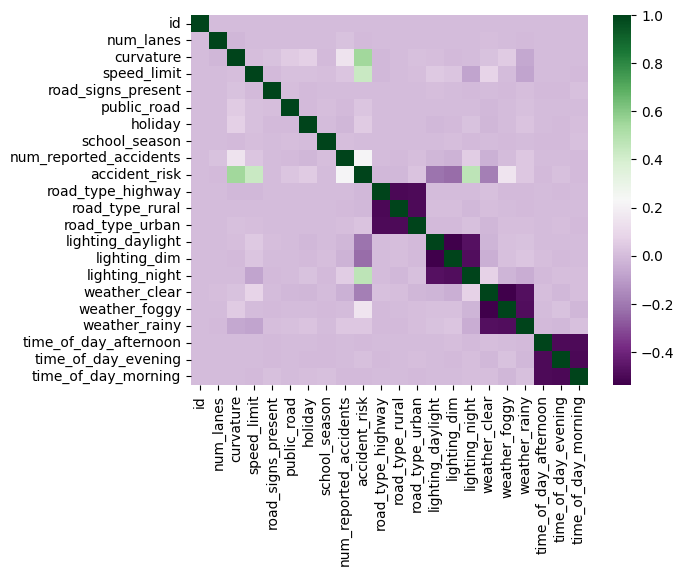

In [117]:
# Create the heatmap to see the correlations between all the columns of train_data
sns.heatmap(train_data.corr(), cmap='PRGn')

In [118]:
# Select features and target
X = train_data.drop('accident_risk', axis=1) # Features
y = train_data['accident_risk'] # Target (the objective), what we want to predict

from sklearn.model_selection import train_test_split
# "test_size=0.2" means 20% data will be used for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Import sklearn libraries to create the models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris

In [120]:
# Data scaling, fit and transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [ ]:
# Define random forest model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate regression model
# RMSE indicates the average difference between the predicted and actual values.
# A lower RMSE means better performance
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse:.4f}")

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], hue=feature_importances.index[:10], palette='viridis', legend=False)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

curvature, lighting, speed limit, the weather, and number of reported accidents in descending order have the strongest correlations to determine the accident_risk value. It means they will most likely affect the driver and passenger's safety, especially the curvature of road.

# K-Nearest Neighbors

In [ ]:
# Define KNN model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluate regression model
# RMSE indicates the average difference between the predicted and actual values.
# A lower RMSE means better performance
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN Regressor RMSE: {rmse2:.4f}")

# Data Prediction

In [ ]:
# Choose the smaller RMSE value between two models
test_pred = rf.predict(test_data) # Random Forest model

In [ ]:
test_pred

In [ ]:
# Read the "sample_submission.csv" file from the folder
submission_file = pd.read_csv("sample_submission.csv")
submission_file

In [ ]:
# Write the prediction results based on the given format
submission_file['accident_risk']=test_pred.round(3)

In [ ]:
# Create the .csv file from it
submission_file.to_csv('submission_accident_risk.csv', index=False)
print("Prediction file successfully created!")